In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

У нас есть 2 датасета с данными и клиентам и логах в приложении. Выгрузим их, посмотрим данные

In [29]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-lisogor/shared/homeworks/python_ds_miniprojects/3/user_data.csv', encoding='windows-1251', sep = ',')

In [30]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [31]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [32]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-lisogor/shared/homeworks/python_ds_miniprojects/3/logs.csv', encoding = 'windows-1251', sep = ',')

In [33]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [13]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [241]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [242]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

###### Какие клиенты совершили больше всего успешных операций?

In [14]:
client_success = logs \
    .query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns={'success': 'count_success'})

In [19]:
most_clients = client_success.sort_values(by = 'count_success', ascending=False)

In [20]:
most_clients.head(10)

,client,count_success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


###### С какой платформы осуществляется наибольшее количество успешных операций?

In [21]:
platforms = logs \
    .query('success == True') \
    .groupby ('platform')

In [59]:
platforms.platform.value_counts().sort_values(ascending = False)

platform  platform
phone     phone       2019
computer  computer    1090
tablet    tablet       180
Name: platform, dtype: int64

###### Какую платформу предпочитают премиумные клиенты?

In [40]:
new_form = logs.merge(user_data, on= 'client')

In [41]:
new_form_premium = new_form \
    .query('premium == True') \
    .groupby ('platform')

In [61]:
new_form_premium.platform.value_counts().sort_values(ascending = False)

platform  platform
phone     phone       246
computer  computer    150
tablet    tablet       24
Name: platform, dtype: int64

In [48]:
new_form_premium.head()

,client,success,platform,time,premium,age
42,35604,False,phone,1585459894,True,65
49,11983,True,phone,1585459511,True,68
52,99308,True,computer,1585409409,True,38
59,49625,False,phone,1585447789,True,65
64,53978,True,computer,1585408637,True,46
110,87780,False,phone,1585455393,True,35
165,85502,True,computer,1585405950,True,58
177,4318,True,phone,1585442895,True,45
188,70178,True,computer,1585464105,True,35
190,45547,False,computer,1585450640,True,40


###### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

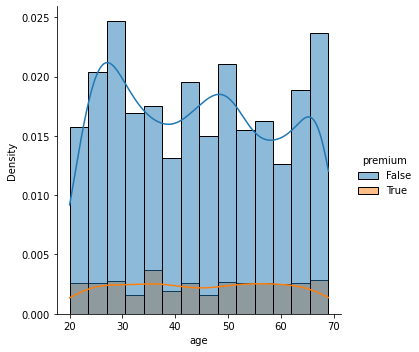

In [63]:
sns.displot(data = new_form, x ='age', hue = 'premium', kde = True, kind = 'hist', stat = 'density', bins = 14)